# Wishart matrix
# S = 1/n * X * X.T, X is p-by-n, X_ij i.i.d N(0,1),
# Eigenvalue distribution of S converges to Marcenko-Pastur distribution with parameter gamma = p/n

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
gamma = 2  # if gamma > 1, there will be a spike in MP distribution at 0
a = (1 - np.sqrt(gamma))**2
b = (1 + np.sqrt(gamma))**2

# Marcenko-Pastur Distribution function
def f_MP(t):
    return np.sqrt(np.maximum(b - t, 0) * np.maximum(t - a, 0)) / (2 * np.pi * gamma * t)

# Non-zero eigenvalue part
n = 400
p = int(n * gamma)
X = np.random.randn(p, n)
S = 1/n * np.dot(X, X.T)
evals = np.sort(np.linalg.eigvalsh(S))[::-1]  # sorted in descending order
nbin = 100
nout, xout = np.histogram(evals, bins=nbin)
hx = xout[1] - xout[0]  # step size, used to compute frequency below
x1 = evals[-1] - 1
x2 = evals[0] + 1  # two end points
xx = np.arange(x1 + hx/2, x2, hx)
fre = f_MP(xx) * hx


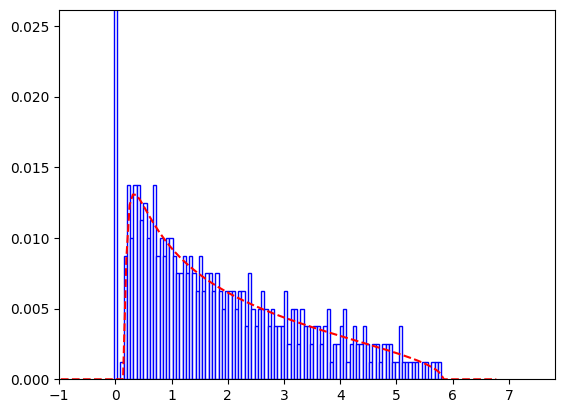

In [3]:
# Plotting
plt.bar(xout[:-1], nout / p, width=hx, color='w', edgecolor='b')
#plt.hold = True  # This line is not needed in modern Matplotlib
plt.plot(xx, fre, '--r')

if gamma > 1:  # there are (1-1/gamma)*p zero eigenvalues
    plt.axis([-1, x2 + 1, 0, max(fre) * 2])

plt.show()

In [4]:
gamma = 0.5  # if gamma > 1, there will be a spike in MP distribution at 0
a = (1 - np.sqrt(gamma))**2
b = (1 + np.sqrt(gamma))**2

# Marcenko-Pastur Distribution function
def f_MP(t):
    return np.sqrt(np.maximum(b - t, 0) * np.maximum(t - a, 0)) / (2 * np.pi * gamma * t)

# Non-zero eigenvalue part
n = 400
p = int(n * gamma)
X = np.random.randn(p, n)
S = 1/n * np.dot(X, X.T)
evals = np.sort(np.linalg.eigvalsh(S))[::-1]  # sorted in descending order
nbin = 100
nout, xout = np.histogram(evals, bins=nbin)
hx = xout[1] - xout[0]  # step size, used to compute frequency below
x1 = evals[-1] - 1
x2 = evals[0] + 1  # two end points
xx = np.arange(x1 + hx/2, x2, hx)
fre = f_MP(xx) * hx

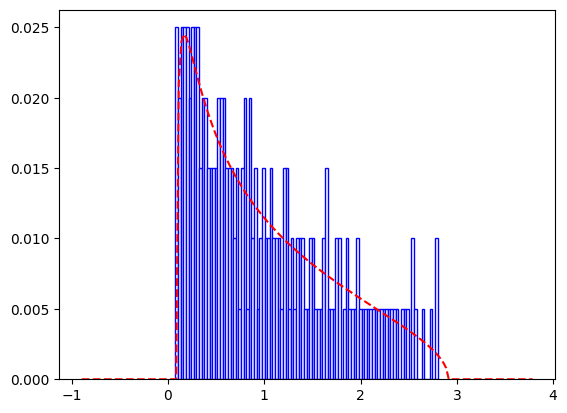

In [5]:
# Plotting
plt.bar(xout[:-1], nout / p, width=hx, color='w', edgecolor='b')
#plt.hold = True  # This line is not needed in modern Matplotlib
plt.plot(xx, fre, '--r')

if gamma > 1:  # there are (1-1/gamma)*p zero eigenvalues
    plt.axis([-1, x2 + 1, 0, max(fre) * 2])

plt.show()